CODIGO DE PREDICCION RELACION E IMPORTANCIAS DE DATASET OBESITY

In [ ]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
#AGREGO DECICSON TREE 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#DESCARGAMOS EL DATASET
data_link = 'https://raw.githubusercontent.com/rebaza98/proyectoML2022/main/ObesityDataSet_raw_and_data_sinthetic.csv'

dataset_completo = pd.read_csv(data_link)
print('El dataset tiene la forma {}.'.format(dataset_completo.shape))

El dataset tiene la forma (2111, 17).


In [ ]:
dataset_completo.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
dataset_completo.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


En este dataset se utilizaron 499 muestras extraidas de una encuesta online mientras la data restante fue generada atravez de la herrameinta SMOTE que permite generar data sintetica o muestras.

In [ ]:
#VIsualiza el tipo de datos de las variables
dataset_completo.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
#Datos Nulos en el dataset
dataset_completo.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
 #Datos unicos que presente el dataset
 unique_percentages = dataset_completo.nunique() / len(dataset_completo)
 unique_percentages

Gender                            0.000947
Age                               0.664140
Height                            0.745618
Weight                            0.722406
family_history_with_overweight    0.000947
FAVC                              0.000947
FCVC                              0.383704
NCP                               0.300805
CAEC                              0.001895
SMOKE                             0.000947
CH2O                              0.600663
SCC                               0.000947
FAF                               0.563714
TUE                               0.534818
CALC                              0.001895
MTRANS                            0.002369
NObeyesdad                        0.003316
dtype: float64

En este paso se diferencian las variables Numericas de las categoricas

In [ ]:
#Determinamos que variables son del tipo númerico y cuales son categóricas
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in dataset_completo:
  #Determinamos si la variable es numérica o no
  if pd.api.types.is_numeric_dtype(dataset_completo[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la variable mediante "astype"
    dataset_completo[column] = dataset_completo[column].astype("category")

    #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset_completo[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset_completo[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

print(dictionary_of_columns_with_index_to_categorical)
print(dictionary_of_columns_with_categorical_to_index)


{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}, 'NObeyesdad': {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': {'no': 0, 'yes': 1}, 'SCC': {'no': 0, 'yes': 1}, 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'MTRANS': {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}, 'NObeye

In [ ]:
for key in dictionary_of_columns_with_categorical_to_index.keys():
  print (key)
  print(dictionary_of_columns_with_categorical_to_index[key].keys())

Gender
dict_keys(['Female', 'Male'])
family_history_with_overweight
dict_keys(['no', 'yes'])
FAVC
dict_keys(['no', 'yes'])
CAEC
dict_keys(['Always', 'Frequently', 'Sometimes', 'no'])
SMOKE
dict_keys(['no', 'yes'])
SCC
dict_keys(['no', 'yes'])
CALC
dict_keys(['Always', 'Frequently', 'Sometimes', 'no'])
MTRANS
dict_keys(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'])
NObeyesdad
dict_keys(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])


In [ ]:
dataset_completo.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Analizaremos la Data CATEGORICA de la Encuesta contra la data Sintetica
Separamos la dataset para su analisis entre data de la encuesta 498 y data sintetica 1613
498 + 1613 = 2111 Total del dataset
 

In [ ]:
dataset_encuesta = dataset_completo.head(498)

In [ ]:
dataset_sintetico = dataset_completo.tail(1613)
dataset_sintetico

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
498,Female,25.196214,1.686306,104.572712,yes,yes,3.0,3.0,Sometimes,no,1.152736,no,0.319156,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
499,Female,18.503343,1.683124,126.673780,yes,yes,3.0,3.0,Sometimes,no,1.115967,no,1.541072,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
500,Female,26.000000,1.622397,110.792630,yes,yes,3.0,3.0,Sometimes,no,2.704507,no,0.000000,0.294990,Sometimes,Public_Transportation,Obesity_Type_III
501,Female,21.853826,1.755643,137.796884,yes,yes,3.0,3.0,Sometimes,no,2.184707,no,1.978631,0.838957,Sometimes,Public_Transportation,Obesity_Type_III
502,Female,21.900120,1.843419,165.057269,yes,yes,3.0,3.0,Sometimes,no,2.406541,no,0.100320,0.479221,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


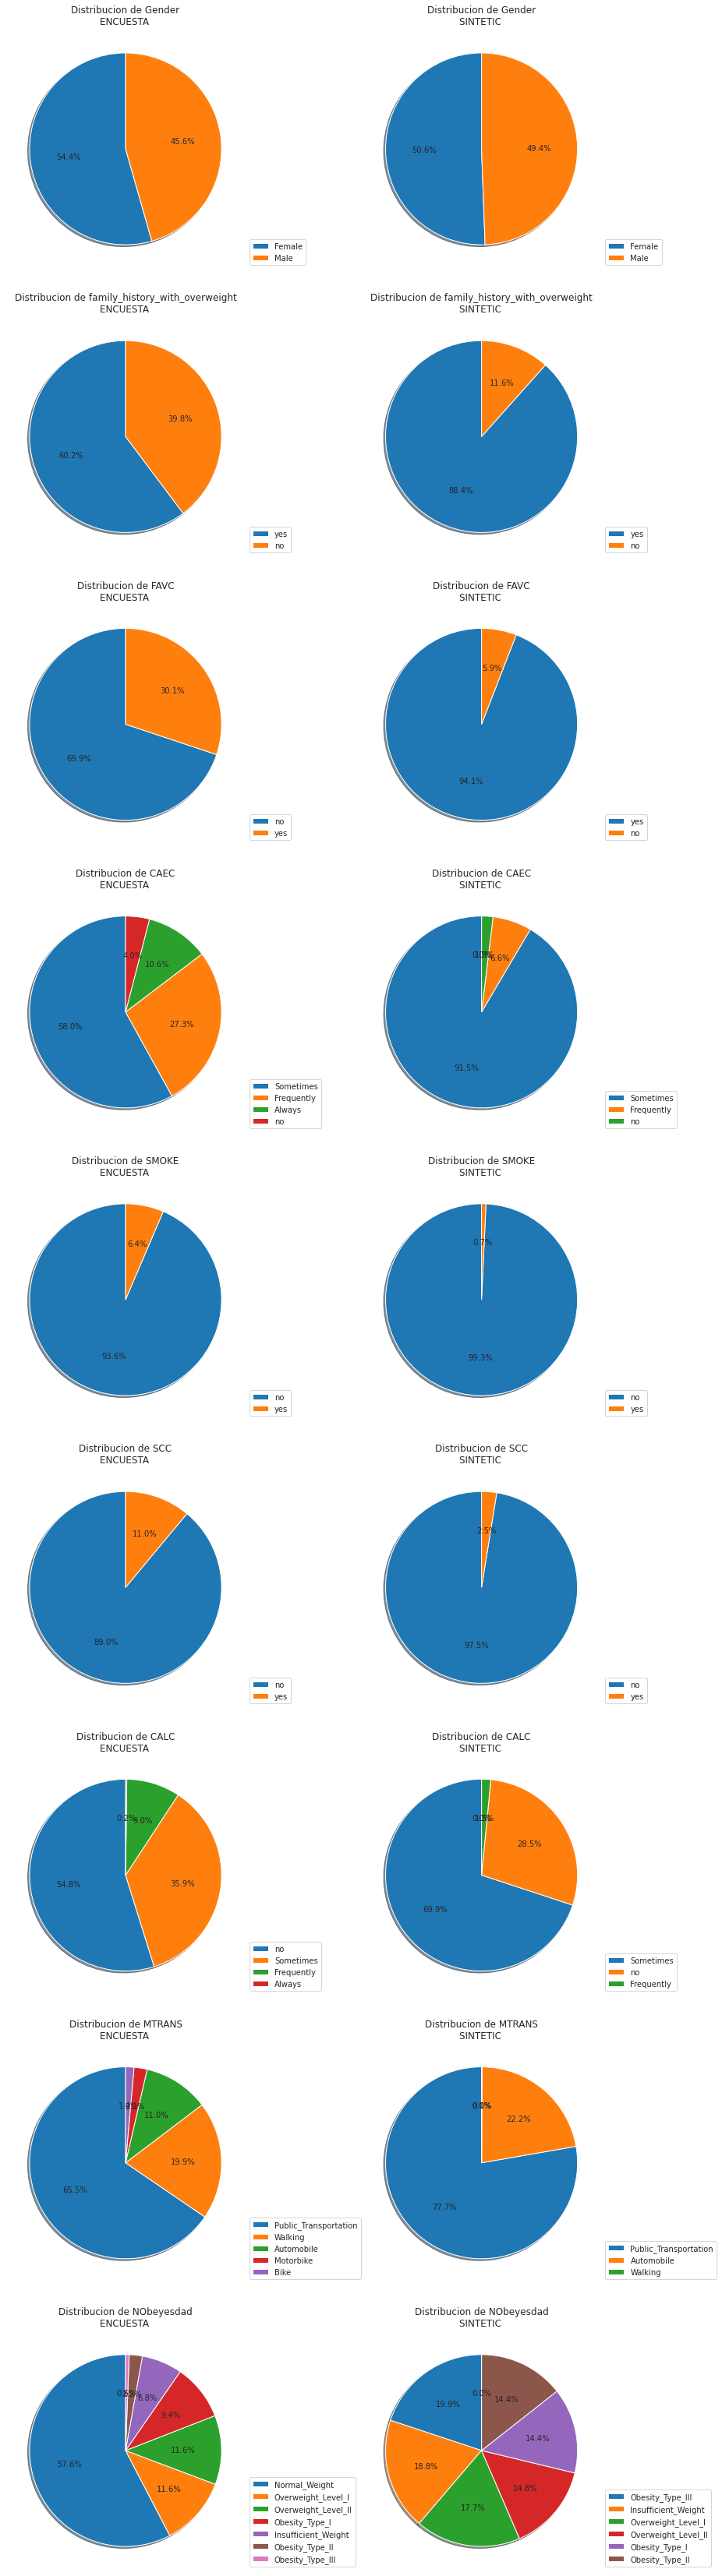

In [ ]:
columnas = 9
filas = 2
fig, axs = plt.subplots(columnas, filas)
fig.set_figheight(60)
fig.set_figwidth(15)
indx = 0 
indy = 0

for key in dictionary_of_columns_with_categorical_to_index.keys():
  data = dataset_encuesta[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_encuesta[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key) +"\nENCUESTA ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0
  #DATASET COMPLETO
  data = dataset_sintetico[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_sintetico[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key)+ "\nSINTETIC ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0
 # set the spacing between subplots



In [ ]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
#Original dataset shape (1000, 20)
print(f'Original dataset samples per class {Counter(y)}')
#Original dataset samples per class Counter({1: 900, 0: 100})
# simulate the 2 last columns to be categorical features
X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
sm = SMOTENC(random_state=42, categorical_features=[18, 19])
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')
#Resampled dataset samples per class Counter({0: 900, 1: 900})
df_x_res = pd.DataFrame(X_res, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13','Column_14','Column_15','Column_16','Column_17','Column_18','Column_19','Column_20'])
df_x_res

Original dataset shape (1000, 20)
Original dataset samples per class Counter({1: 900, 0: 100})
Resampled dataset samples per class Counter({0: 900, 1: 900})


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20
0,0.600131,-1.427664,-0.812843,0.186196,-0.446072,1.461538,-0.207926,-0.121374,-0.064468,-1.331016,-1.669194,-0.139450,0.030954,-0.517951,-0.429622,-0.450095,2.303853,-0.553024,1.0,1.0
1,0.253641,-1.456387,-0.522598,-1.200570,-0.595553,3.498593,0.447354,0.752679,-0.433422,1.552543,2.169113,-0.753243,0.655625,0.612429,-1.190286,0.197738,1.001912,1.694093,0.0,3.0
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,2.979158,3.776249,0.766967,-1.461127,-0.505163,3.570647,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,0.0,1.0
3,-0.313907,-2.714269,-0.461789,0.451429,0.299209,2.328047,4.721086,-1.460665,-1.075703,0.303755,3.837803,-0.850576,-2.456657,-0.533510,-1.476944,0.430563,-1.735455,-2.002849,3.0,0.0
4,-1.262870,0.119181,-1.234628,0.253147,1.551433,2.353700,3.664477,-0.633148,-1.769543,-0.164800,2.857416,1.080204,-0.765970,-0.633663,-2.961579,1.494173,-2.712421,-0.617613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.700549,-0.906335,0.412648,0.142560,-0.509328,1.350798,-0.052941,0.574853,-0.542820,-1.433762,-1.244016,-0.631402,-0.417336,-0.265938,-0.325862,0.110504,1.772547,0.237836,1.0,3.0
1796,0.289856,-0.474097,0.551960,-0.507507,-0.605190,1.008497,-0.443420,-0.040803,-1.163050,0.921084,-1.711414,0.603338,1.356677,0.971475,-0.584800,0.944532,0.996001,0.275877,2.0,1.0
1797,0.201918,-1.098430,-0.334656,0.961525,0.258311,1.819244,-0.419889,1.331798,-0.319903,-0.645441,-2.013284,-1.082098,-2.197058,-0.468758,0.849585,0.552005,0.578882,-0.372677,3.0,0.0
1798,0.618525,-0.104858,0.881105,-0.266670,-1.443297,0.910794,-0.571407,-0.489873,0.044916,0.532058,-1.620055,-1.686375,0.176776,1.210030,0.356465,-0.455280,-0.101598,0.646897,0.0,1.0


In [ ]:
dataset_encuesta

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Male,20.0,1.80,65.0,no,yes,2.0,3.0,Frequently,no,1.0,no,2.0,0.0,Sometimes,Motorbike,Normal_Weight
494,Female,18.0,1.67,66.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal_Weight
495,Male,19.0,1.80,60.0,yes,yes,3.0,1.0,Always,no,1.0,yes,0.0,0.0,no,Motorbike,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
from imblearn.over_sampling import SMOTENC
#Obatin column index for categorical features
#cat_col_index = list(range(len(num_cols_names),59))
#Instantiate SMOTENC algorith with 60% oversampling
y = dataset_encuesta["NObeyesdad"]



sm = SMOTENC(categorical_features=[0,4,5,6,7,8,9,10,11,12,13,14,15,16], k_neighbors=2)
X_trainres, Y_trainers = sm.fit_resample(dataset_encuesta,y)

Y_trainers


 # set the spacing between subplots




# columnas = 9
# filas = 2
# fig, axs = plt.subplots(columnas, filas)
# fig.set_figheight(60)
# fig.set_figwidth(15)
# indx = 0 
# indy = 0


# data = X_trainres["NObeyesdad"].value_counts()
# axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
# labels = dataset_encuesta["NObeyesdad"].unique()
# axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
# axs[indx, indy].set_title('Distribucion de ' +  str("NObeyesdad"), fontsize = 12)

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2004    Overweight_Level_II
2005    Overweight_Level_II
2006    Overweight_Level_II
2007    Overweight_Level_II
2008    Overweight_Level_II
Name: NObeyesdad, Length: 2009, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

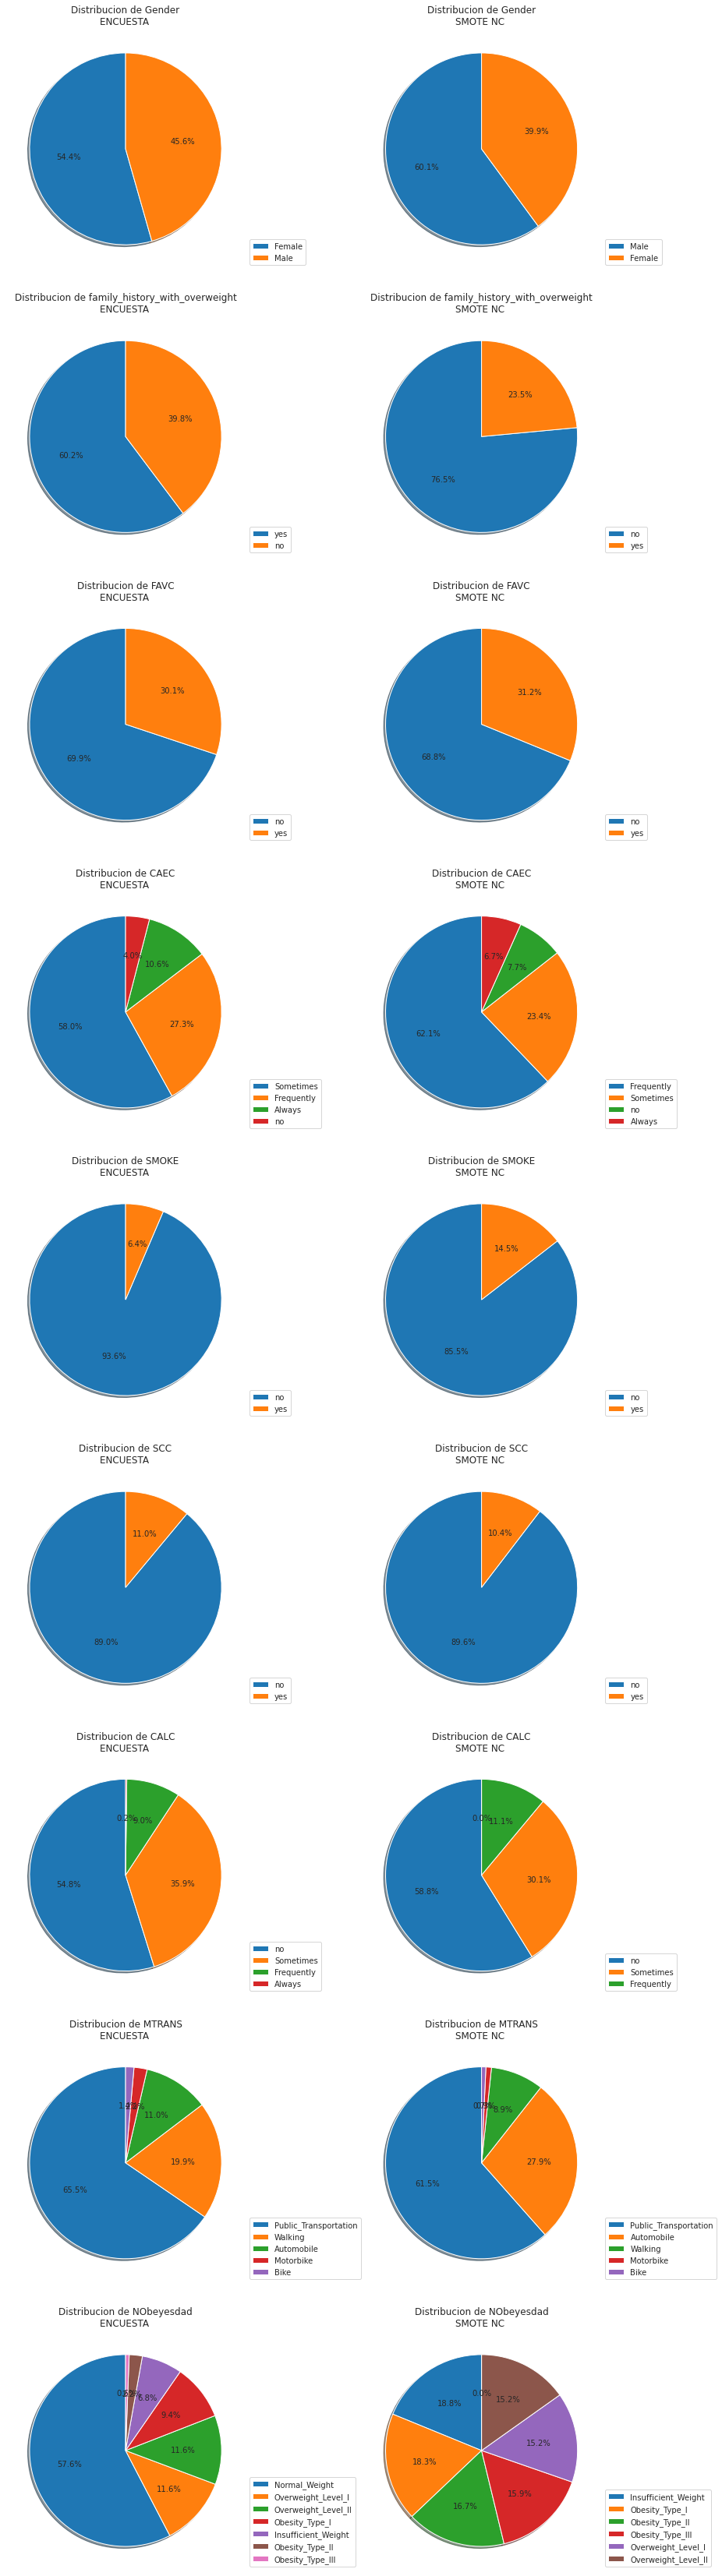

In [ ]:
dataset_sintetico_2 = X_trainres.tail(1510)

#GRAFICAMOS LA NUEVA RELACION 
columnas = 9
filas = 2
fig, axs = plt.subplots(columnas, filas)
fig.set_figheight(60)
fig.set_figwidth(15)
indx = 0 
indy = 0

for key in dictionary_of_columns_with_categorical_to_index.keys():
  data = dataset_encuesta[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_encuesta[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key) +"\nENCUESTA ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0
  #DATASET COMPLETO
  data = dataset_sintetico_2[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_sintetico_2[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key)+ "\nSMOTE NC ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0

In [ ]:
X_trainres

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Male,24.201122,1.700000,84.597756,yes,yes,2.0,3.0,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II
2005,Male,40.904341,1.799522,91.904341,no,yes,2.0,3.0,Frequently,no,2.0,no,0.0,0.0,Sometimes,Automobile,Overweight_Level_II
2006,Male,33.000000,1.850000,97.113666,yes,yes,2.0,3.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
2007,Male,34.249919,1.709993,84.249919,yes,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Automobile,Overweight_Level_II


In [ ]:
from google.colab import  drive
drive.mount('/content/drive')
X_trainres.to_csv('drive/My Drive/maestria2022-1/machineLearning/nuevoDS.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Metodo que retorna el dataset convertido
def fillColumnaCategorica(dataset):
  datacopy = dataset.copy()

  #REMOVER COLUMNA DURACION HEIGHT and WEIGHT
  
  datacopy = datacopy.drop("Height", axis=1)
  datacopy = datacopy.drop("Weight", axis=1)
  
  
    #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in datacopy:
    #Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(datacopy[column]):
      numeric_columns.append(column)
    else:
      #Modificamos el tipo de dato de la variable mediante "astype"
      datacopy[column] = datacopy[column].astype("category")

      #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
      if not pd.api.types.is_categorical_dtype(datacopy[column]):
        raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

      dictionary_of_columns_with_index_to_categorical[column] = dict()
      dictionary_of_columns_with_categorical_to_index[column] = dict()
      
      #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
      for index, category in enumerate(datacopy[column].cat.categories):
        dictionary_of_columns_with_index_to_categorical[column][index] = category
        dictionary_of_columns_with_categorical_to_index[column][category] = index
      
      categorical_columns.append(column)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  datacopy.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  print("COLUMNAS NUMERICAS", numeric_columns)
  print("COLUMNAS CATEGORICAS",categorical_columns)
  print("DICCIONARIOS DE VALORES ")
  print(dictionary_of_columns_with_index_to_categorical)
  print(dictionary_of_columns_with_categorical_to_index)
  

 
  return datacopy

In [ ]:
dataset_train = fillColumnaCategorica(dataset_sintetico_2)
dataset_train
dataset_test = fillColumnaCategorica(dataset_encuesta)
dataset_test
#predictions
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_train = dataset_train["NObeyesdad"]
x_train = dataset_train.drop("NObeyesdad", axis=1)

y_test = dataset_test["NObeyesdad"]
x_test = dataset_test.drop("NObeyesdad", axis=1)

#Entrenamos el random forest 
model_rf = RandomForestClassifier(n_estimators= 85, n_jobs=-1, oob_score=True)


model_rf.fit(x_train, y_train)

#Scores
print(f"Scores:")
print(f"Train      = {model_rf.score(x_train, y_train):.4}")
print(f"Validation = {model_rf.score(x_test, y_test):.4}")
if hasattr(model_rf, "oob_score_"): print(f"OOB        = {model_rf.oob_score_:.4}")

#Podemos verificar las etiquetas que tuvo que predecir nuestro árbol de clasificación
print("Etiquetas a predecir: {}".format(set(y_train)))

print("Etiquetas predecidas: {}".format(model_rf.classes_))

COLUMNAS NUMERICAS ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
COLUMNAS CATEGORICAS ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
DICCIONARIOS DE VALORES 
{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}, 'NObeyesdad': {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': 

In [ ]:
#X_trainres
all_dataset = fillColumnaCategorica(X_trainres)
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_dt = all_dataset["NObeyesdad"]
x_dt = all_dataset.drop("NObeyesdad", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_dt, y_dt, test_size=0.2, random_state=0, stratify=y_dt)
#Entrenamos otro random forest 
model_rf2 = RandomForestClassifier(n_estimators= 85, n_jobs=-1, oob_score=True)


model_rf2.fit(x_train, y_train)

#Scores
print(f"Scores:")
print(f"Train      = {model_rf2.score(x_train, y_train):.4}")
print(f"Validation = {model_rf2.score(x_test, y_test):.4}")
if hasattr(model_rf2, "oob_score_"): print(f"OOB        = {model_rf2.oob_score_:.4}")

COLUMNAS NUMERICAS ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
COLUMNAS CATEGORICAS ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
DICCIONARIOS DE VALORES 
{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}, 'NObeyesdad': {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': 

In [ ]:
#X_trainres
all_dataset = fillColumnaCategorica(dataset_completo)
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
y_dt = all_dataset["NObeyesdad"]
x_dt = all_dataset.drop("NObeyesdad", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_dt, y_dt, test_size=0.2, random_state=0, stratify=y_dt)
#Entrenamos otro random forest 
model_rf2 = RandomForestClassifier(n_estimators= 85, n_jobs=-1, oob_score=True)


model_rf2.fit(x_train, y_train)

#Scores
print(f"Scores:")
print(f"Train      = {model_rf2.score(x_train, y_train):.4}")
print(f"Validation = {model_rf2.score(x_test, y_test):.4}")
if hasattr(model_rf2, "oob_score_"): print(f"OOB        = {model_rf2.oob_score_:.4}")

COLUMNAS NUMERICAS ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
COLUMNAS CATEGORICAS ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
DICCIONARIOS DE VALORES 
{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}, 'NObeyesdad': {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': 

In [ ]:
# # Color and style change according to category
# # Data
# df1=df[df['gear']==3]
# df2=df[df['gear']==4]
# df3=df[df['gear']==5]

# # PLOT
# plt.scatter(df1['mpg'],df1['disp'],color='blue', marker= '*', label='gear=3')
# plt.scatter(df2['mpg'],df2['disp'],color= 'red', marker='v', label='gear=4')
# plt.scatter(df3['mpg'],df3['disp'],color= 'green', marker='.', label='gear=5')
# plt.legend()